## Wearable Tech: Week 1 Assignment

## Step 1

In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime

# Read in the dataset

df = pd.read_csv("../Data/TexasTechVBall.csv")

## Step 2

In [2]:
# Copy of dataframe
df_vb=df

# Set up Date and Week
df_vb.loc[:,'DATE'] = pd.to_datetime(df_vb['DATE'], errors='coerce')
df_vb.loc[:,'WEEK'] = (df_vb['DATE'].dt.week) - 33
df_vb['WEEK'] = df_vb['WEEK'].astype('object')

df_vb.head()

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_20820\1844646698.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_vb.loc[:,'WEEK'] = (df_vb['DATE'].dt.week) - 33


,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %,WEEK
0,8/19/19,PRAC,2019-08-19,Erika,S,1595,2750,2.9,9.6,15.6,...,8,0,17.7,14.0,62,22.5,0,0,0,1
1,8-19-19#2,PRAC,2019-08-19,Erika,S,1020,2750,1.9,8.4,14.6,...,2,1,21.7,13.4,60,22.5,0,0,0,1
2,8/19/19,PRAC,2019-08-19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,126,8,22.2,18.8,75,25.0,3,2,5,1
3,8-19-19#2,PRAC,2019-08-19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,41,2,20.4,17.9,72,25.0,4,0,4,1
4,8/19/19,PRAC,2019-08-19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,113,91,28.9,26.5,88,30.0,7,2,9,1


## Step 3

In [3]:
# Mean value for total jumps, jumps over 15, jumps over 20, highest jumps
jumps = df_vb.groupby(['EVENT TYPE','POSITION'])[['JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)']].mean()
print(jumps)

                          JUMPS   JUMPS 15+  JUMPS 20+  HIGHEST JUMP (in)
EVENT TYPE POSITION                                                      
GAME       MB         77.652174   64.391304  24.434783          25.591304
           OH         48.905660   39.981132  23.962264          26.794340
           S          96.583333   23.458333   0.791667          19.112500
PRAC       MB        132.010000   97.520000  22.450000          24.363000
           OH         81.157407   66.995370  32.972222          25.838605
           S         106.728814   23.991525   0.813559          19.203390
SCRIMMAGE  MB        159.333333  132.000000  35.666667          24.600000
           OH         90.000000   80.428571  53.142857          27.828571
           S         138.750000   37.250000   3.000000          20.225000


## Step 4

In [4]:
# Means of Landing Type
landing = df_vb.groupby(['EVENT TYPE','POSITION'])[['ELEVATED LANDING %', 'HIGH LANDING %', 'ALERT LANDING %']].mean()
print(landing)

                     ELEVATED LANDING %  HIGH LANDING %  ALERT LANDING %
EVENT TYPE POSITION                                                     
GAME       MB                  7.739130        5.608696         2.304348
           OH                 12.867925       10.226415         2.622642
           S                   4.541667        2.833333         1.791667
PRAC       MB                  4.330000        3.420000         0.860000
           OH                  6.870370        5.361111         1.504630
           S                   1.245763        0.991525         0.271186
SCRIMMAGE  MB                  3.000000        2.666667         0.333333
           OH                 10.428571        6.285714         4.000000
           S                   3.750000        3.500000         0.250000


## Step 5

Text(0, 0.5, 'Alert Landing %')

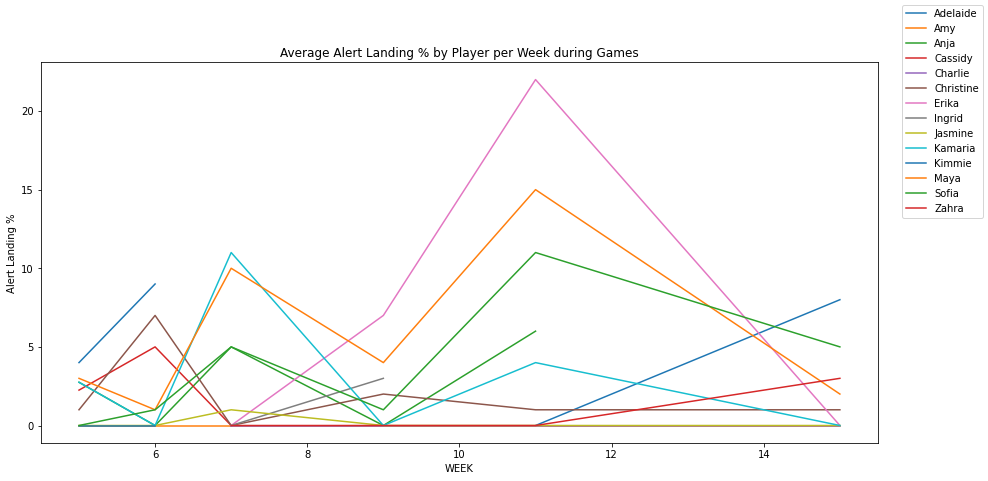

In [5]:
# Plots for Game Alert Landings
df_game = df_vb.loc[df_vb['EVENT TYPE'] == 'GAME']

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_game.groupby(['WEEK', 'PLAYER NAME']).mean()['ALERT LANDING %'].unstack().plot(ax=ax, legend=False)

fig.legend(loc="upper right")
plt.title("Average Alert Landing % by Player per Week during Games")
plt.ylabel("Alert Landing %")

## Step 6

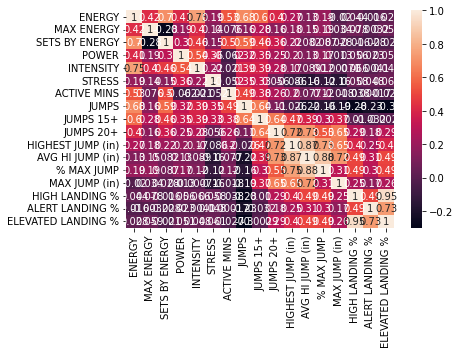

In [6]:
corrMatrix = df_vb.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()